<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Wrangling Lab**


Estimated time needed: **45** minutes


In this lab, you will perform data wrangling tasks to prepare raw data for analysis. Data wrangling involves cleaning, transforming, and organizing data into a structured format suitable for analysis. This lab focuses on tasks like identifying inconsistencies, encoding categorical variables, and feature transformation.


## Objectives


After completing this lab, you will be able to:


- Identify and remove inconsistent data entries.

- Encode categorical variables for analysis.

- Handle missing values using multiple imputation strategies.

- Apply feature scaling and transformation techniques.


#### Intsall the required libraries


In [3]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 125.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 177.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 149.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 133.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 153.8 MB/s eta 0:00:00


## Tasks


#### Step 1: Import the necessary module.


### 1. Load the Dataset


<h5>1.1 Import necessary libraries and load the dataset.</h5>


Ensure the dataset is loaded correctly by displaying the first few rows.


In [4]:
# Import necessary libraries
import pandas as pd

# Load the Stack Overflow survey data
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(dataset_url)

# Display the first few rows
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

#### 2. Explore the Dataset


<h5>2.1 Summarize the dataset by displaying the column data types, counts, and missing values.</h5>


In [5]:
# Write your code here
summary = pd.DataFrame({
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    'Missing Values': df.isnull().sum(),
    'Missing %': (df.isnull().sum()/len(df))*100
})

summary

,Data Type,Non-Null Count,Missing Values,Missing %
ResponseId,int64,65437,0,0.000000
MainBranch,object,65437,0,0.000000
Age,object,65437,0,0.000000
Employment,object,65437,0,0.000000
RemoteWork,object,54806,10631,16.246160
...,...,...,...,...
JobSatPoints_11,float64,29445,35992,55.002522
SurveyLength,object,56182,9255,14.143375
SurveyEase,object,56238,9199,14.057796
ConvertedCompYearly,float64,23435,42002,64.186928


<h5>2.2 Generate basic statistics for numerical columns.</h5>


In [6]:
# Write your code here
print("\n--- Numerical Column Statistics ---")
stats = df.describe()
print(stats)


--- Numerical Column Statistics ---
         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+04      4.000000        0.000000   
50%    32719.000000   1.100000e+05      9.000000       10.000000   
75%    49078.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e+150     50.000000      100.000000   

       JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  \
count    29393.000000    29411.000000    29450.000000     29448.00000   
mean         7.522140       10.060857       24.343232        22.96522   
std         18.422661       21.833836       27.089360        27.01774   
min          0.000000        0.000000        0.000000     

### 3. Identifying and Removing Inconsistencies


<h5>3.1 Identify inconsistent or irrelevant entries in specific columns (e.g., Country).</h5>


In [7]:
# Write your code here
print(df['Country'].unique())
print(df['Country'].value_counts())


['United States of America'
 'United Kingdom of Great Britain and Northern Ireland' 'Canada' 'Norway'
 'Uzbekistan' 'Serbia' 'Poland' 'Philippines' 'Bulgaria' 'Switzerland'
 'India' 'Germany' 'Ireland' 'Italy' 'Ukraine' 'Australia' 'Brazil'
 'Japan' 'Austria' 'Iran, Islamic Republic of...' 'France' 'Saudi Arabia'
 'Romania' 'Turkey' 'Nepal' 'Algeria' 'Sweden' 'Netherlands' 'Croatia'
 'Pakistan' 'Czech Republic' 'Republic of North Macedonia' 'Finland'
 'Slovakia' 'Russian Federation' 'Greece' 'Israel' 'Belgium' 'Mexico'
 'United Republic of Tanzania' 'Hungary' 'Argentina' 'Portugal'
 'Sri Lanka' 'Latvia' 'China' 'Singapore' 'Lebanon' 'Spain' 'South Africa'
 'Lithuania' 'Viet Nam' 'Dominican Republic' 'Indonesia' 'Kosovo'
 'Morocco' 'Taiwan' 'Georgia' 'San Marino' 'Tunisia' 'Bangladesh'
 'Nigeria' 'Liechtenstein' 'Denmark' 'Ecuador' 'Malaysia' 'Albania'
 'Azerbaijan' 'Chile' 'Ghana' 'Peru' 'Bolivia' 'Egypt' 'Luxembourg'
 'Montenegro' 'Cyprus' 'Paraguay' 'Kazakhstan' 'Slovenia' 'Jordan'
 

<h5>3.2 Standardize entries in columns like Country or EdLevel by mapping inconsistent values to a consistent format.</h5>


In [8]:
## Write your code here
# Making a copy to avoid modifying the original DataFrame
df_clean = df.copy()

#Standardize Country names ----
country_mapping = {
    'US': 'United States',
    'U.S.': 'United States',
    'UK': 'United Kingdom',
    'U.K.': 'United Kingdom',
    'IN': 'India',
    'INDIA': 'India',
    'CAN': 'Canada',
    'CANADA': 'Canada'
}

df_clean['Country'] = df_clean['Country'].replace(country_mapping)

# Strip spaces and capitalize entries
df_clean['Country'] = df_clean['Country'].str.strip().str.title()

# ---- Standardize Education Level ----
edlevel_mapping = {
    'Bachelor’s degree': "Bachelor's",
    'Bachelors': "Bachelor's",
    'Master’s degree': "Master's",
    'Masters': "Master's",
    'PhD': 'Doctorate',
    'Ph.D': 'Doctorate',
}

df_clean['EdLevel'] = df_clean['EdLevel'].replace(edlevel_mapping)
df_clean['EdLevel'] = df_clean['EdLevel'].str.strip().str.title()

# Verify changes
print(df_clean[['Country', 'EdLevel']].head(10))


                                             Country  \
0                           United States Of America   
1  United Kingdom Of Great Britain And Northern I...   
2  United Kingdom Of Great Britain And Northern I...   
3                                             Canada   
4                                             Norway   
5                           United States Of America   
6                           United States Of America   
7                                         Uzbekistan   
8  United Kingdom Of Great Britain And Northern I...   
9                                             Serbia   

                                             EdLevel  
0                          Primary/Elementary School  
1       Bachelor’S Degree (B.A., B.S., B.Eng., Etc.)  
2    Master’S Degree (M.A., M.S., M.Eng., Mba, Etc.)  
3  Some College/University Study Without Earning ...  
4  Secondary School (E.G. American High School, G...  
5                          Primary/Elementary School 

### 4. Encoding Categorical Variables


<h5>4.1 Encode the Employment column using one-hot encoding.</h5>


In [11]:
## Write your code here

!pip install scikit-learn
# Step 1: Split the categories into lists
df['Employment'] = df['Employment'].fillna('Unknown')  # handle missing values
df['Employment'] = df['Employment'].apply(
    lambda x: x if isinstance(x, list) else x.split(';')
)

# Step 2: Use MultiLabelBinarizer for one-hot encoding
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
employment_encoded = pd.DataFrame(
    mlb.fit_transform(df['Employment']),
    columns=mlb.classes_,
    index=df.index
)

# Step 3: Concatenate back to the original DataFrame
df = pd.concat([df, employment_encoded], axis=1)

# Check the result
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSat,"Employed, full-time","Employed, part-time",I prefer not to say,"Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Not employed, but looking for work",Retired,"Student, full-time","Student, part-time"
0,1,I am a developer by profession,Under 18 years old,"[Employed, full-time]",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,1,0,0,0,0,0,0,0,0
1,2,I am a developer by profession,35-44 years old,"[Employed, full-time]",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,1,0,0,0,0,0,0,0,0
2,3,I am a developer by profession,45-54 years old,"[Employed, full-time]",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,1,0,0,0,0,0,0,0,0
3,4,I am learning to code,18-24 years old,"[Student, full-time]",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,0,0,0,0,0,0,0,1,0
4,5,I am a developer by profession,18-24 years old,"[Student, full-time]",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,0,0,0,0,0,0,0,1,0


### 5. Handling Missing Values


<h5>5.1 Identify columns with the highest number of missing values.</h5>


In [12]:
## Write your code here
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values[missing_values > 0]

AINextMuch less integrated    64289
AINextLess integrated         63082
AINextNo change               52939
AINextMuch more integrated    51999
EmbeddedAdmired               48704
                              ...  
YearsCode                      5568
NEWSOSites                     5151
LearnCode                      4949
EdLevel                        4653
AISelect                       4530
Length: 109, dtype: int64

<h5>5.2 Impute missing values in numerical columns (e.g., `ConvertedCompYearly`) with the mean or median.</h5>


In [14]:
## Write your code here
# to check skewness - skewed ---> median
# df['ConvertedCompYearly'].describe()
# df['ConvertedCompYearly'].hist() 
median_value = df['ConvertedCompYearly'].median()
df['ConvertedCompYearly'].fillna(median_value, inplace=True)


/tmp/ipykernel_331/191451114.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].fillna(median_value, inplace=True)


<h5>5.3 Impute missing values in categorical columns (e.g., `RemoteWork`) with the most frequent value.</h5>


In [16]:
## Write your code here
df['RemoteWork'].fillna(df['RemoteWork'].mode()[0], inplace=True)

### 6. Feature Scaling and Transformation


<h5>6.1 Apply Min-Max Scaling to normalize the `ConvertedCompYearly` column.</h5>


In [17]:
## Write your code here
from sklearn.preprocessing import MinMaxScaler

# Initialising the scaler
scaler = MinMaxScaler()

#Min-Max Scaling
df['ConvertedCompYearly_Scaled'] = scaler.fit_transform(df[['ConvertedCompYearly']])

# Changes
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_Scaled']].head())


   ConvertedCompYearly  ConvertedCompYearly_Scaled
0              65000.0                    0.003998
1              65000.0                    0.003998
2              65000.0                    0.003998
3              65000.0                    0.003998
4              65000.0                    0.003998


<h5>6.2 Log-transform the ConvertedCompYearly column to reduce skewness.</h5>


In [18]:
## Write your code here
import numpy as np
df['ConvertedCompYearly_log'] = np.log1p(df['ConvertedCompYearly'])
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_log']].head())


   ConvertedCompYearly  ConvertedCompYearly_log
0              65000.0                11.082158
1              65000.0                11.082158
2              65000.0                11.082158
3              65000.0                11.082158
4              65000.0                11.082158


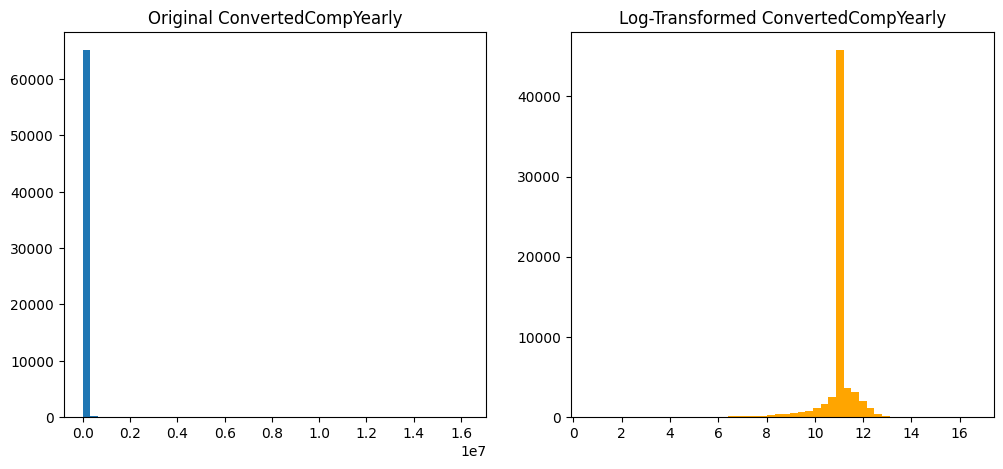

In [19]:
#Visualising skewness
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(df['ConvertedCompYearly'], bins=50)
plt.title("Original ConvertedCompYearly")

plt.subplot(1,2,2)
plt.hist(df['ConvertedCompYearly_log'], bins=50, color='orange')
plt.title("Log-Transformed ConvertedCompYearly")

plt.show()

### 7. Feature Engineering


<h5>7.1 Create a new column `ExperienceLevel` based on the `YearsCodePro` column:</h5>


In [21]:
## Write your code here
import numpy as np

def categorize_experience(years):
    # Handle special values like 'Less than 1 year', 'More than 50 years', or missing
    if pd.isnull(years):
        return "Unknown"
    try:
        years = float(years)
    except ValueError:
        if "less" in str(years).lower():
            return "Beginner"
        elif "more" in str(years).lower():
            return "Expert"
        else:
            return "Unknown"
    
    # Categorize based on numeric years
    if years <= 1:
        return "Beginner"
    elif years <= 5:
        return "Intermediate"
    elif years <= 10:
        return "Advanced"
    else:
        return "Expert"

df['ExperienceLevel'] = df['YearsCodePro'].apply(categorize_experience)

#Distribution
print(df['ExperienceLevel'].value_counts())


ExperienceLevel
Expert          18460
Intermediate    15002
Unknown         13827
Advanced        12653
Beginner         5495
Name: count, dtype: int64


### Summary


In this lab, you:

- Explored the dataset to identify inconsistencies and missing values.

- Encoded categorical variables for analysis.

- Handled missing values using imputation techniques.

- Normalized and transformed numerical data to prepare it for analysis.

- Engineered a new feature to enhance data interpretation.


Copyright © IBM Corporation. All rights reserved.
